<a href="https://colab.research.google.com/github/mpakaBrice/bank-loan-analysis/blob/main/pr%C3%AAt_bancaire_projet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

# Login using e.g. `huggingface-cli login` to access this dataset
df = pd.read_csv("hf://datasets/kheejay88/Bank_Personal_Loan_Modelling/Bank_Personal_Loan_Modelling.csv")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [3]:
df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [4]:
df.head() #chargement des données

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [5]:
df.info() #la structure des données

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [6]:
df.nunique() #Le nombre de valeur unique

,0
ID,5000
Age,45
Experience,47
Income,162
ZIP Code,467
Family,4
CCAvg,108
Education,3
Mortgage,347
Personal Loan,2


In [7]:
df["Age"].value_counts() #le nombre d’occurrences de chaque valeur dans la colonne Age.

,count
Age,
35,151
43,149
52,145
58,143
54,143
50,138
41,136
30,136
56,135


In [8]:
df["Age"].unique() #la liste des valeurs distinctes présentes dans la colonne Age.

array([25, 45, 39, 35, 37, 53, 50, 34, 65, 29, 48, 59, 67, 60, 38, 42, 46,
       55, 56, 57, 44, 36, 43, 40, 30, 31, 51, 32, 61, 41, 28, 49, 47, 62,
       58, 54, 33, 27, 66, 24, 52, 26, 64, 63, 23])

In [9]:
df["Education"].value_counts() #le nombre d’occurrences de chaque valeur dans la colonne Education.

,count
Education,
1,2096
3,1501
2,1403


In [10]:
df.dropna() #suppression des lignes contenant des valeurs manquantes (NaN)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [11]:
df.drop_duplicates() # suppression des lignes dupliquées


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [12]:
df.describe() #La valeur -3.000 dans la colone Experience n'a pas de sens nous allons la convertir en valeur positive

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [13]:
df['Experience']= abs(df['Experience']) #valeur négative dans la colone Experience converti en valeur positive

In [14]:
df.describe() #La valeur -3.000 est converti en 0

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.134600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.415189,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,0.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [15]:
df["Client_Souscripteur"] = df["Personal Loan"].apply( lambda x: "Oui" if x == 1 else "Non" ) # création d'une colone Client_souscripteur
df


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Client_Souscripteur
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0,Non
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0,Non
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0,Non
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0,Non
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1,Non
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0,Non
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0,Non
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0,Non
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0,Non


In [16]:
df["Client_Fort_Souscripteur"] = ( (df["Personal Loan"] == 1) & (df["Income"] > df["Income"].median()) ) #création d'une nouvelle colonne booléenne appelée Client_Fort_Souscripteur.
df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Client_Souscripteur,Client_Fort_Souscripteur
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0,Non,False
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0,Non,False
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0,Non,False
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0,Non,False
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1,Non,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0,Non,False
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0,Non,False
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0,Non,False
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0,Non,False


In [17]:
df["Client_Fort_Souscripteur"] = df["Client_Fort_Souscripteur"].map( {True: "Oui", False: "Non"} ) # convertit une colonne booléenne en colonne catégorielle avec des valeurs "Oui" / "Non".
df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Client_Souscripteur,Client_Fort_Souscripteur
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0,Non,Non
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0,Non,Non
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0,Non,Non
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0,Non,Non
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1,Non,Non
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0,Non,Non
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0,Non,Non
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0,Non,Non
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0,Non,Non


In [18]:
df[["Personal Loan", "Income", "Client_Fort_Souscripteur"]].head() # affichage des colones
df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Client_Souscripteur,Client_Fort_Souscripteur
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0,Non,Non
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0,Non,Non
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0,Non,Non
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0,Non,Non
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1,Non,Non
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0,Non,Non
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0,Non,Non
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0,Non,Non
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0,Non,Non


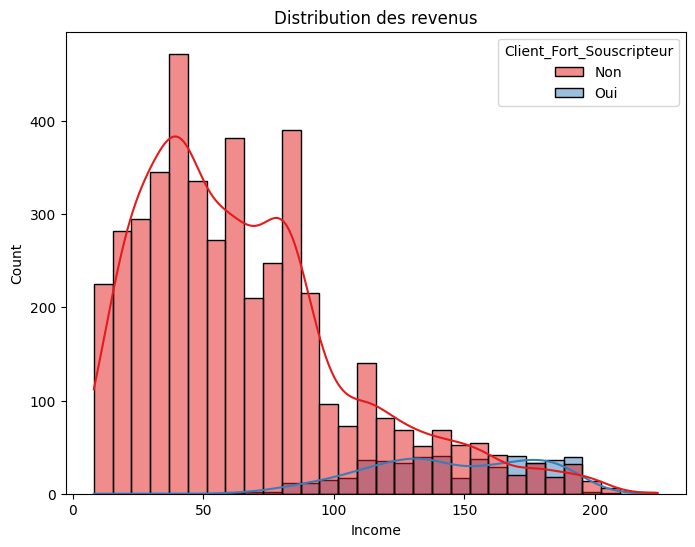

In [19]:
plt.figure(figsize=(8, 6))

sns.histplot(
    data=df,
    x="Income",
    hue="Client_Fort_Souscripteur",
    bins=30,
    kde=True,
    palette="Set1"
)

plt.title("Distribution des revenus")
plt.show()

In [20]:
bins_age = [20, 30, 40, 50, 60, 70]
labels_age = ["20-30", "30-40", "40-50", "50-60", "60-70"]

df["Age_group"] = pd.cut(df["Age"], bins=bins_age, labels=labels_age)

In [21]:
taux_age = (
    df.groupby("Age_group")["Personal Loan"]
      .mean()
      .reset_index()
)

print(taux_age)

  Age_group  Personal Loan
0     20-30       0.105769
1     30-40       0.095469
2     40-50       0.096063
3     50-60       0.086924
4     60-70       0.107861


/tmp/ipython-input-2209481235.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("Age_group")["Personal Loan"]


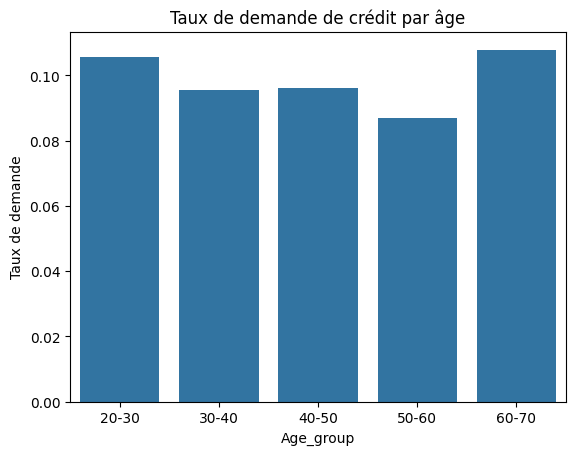

In [22]:
sns.barplot(data=taux_age, x="Age_group", y="Personal Loan")
plt.title("Taux de demande de crédit par âge")
plt.ylabel("Taux de demande")
plt.show()

/tmp/ipython-input-846488836.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


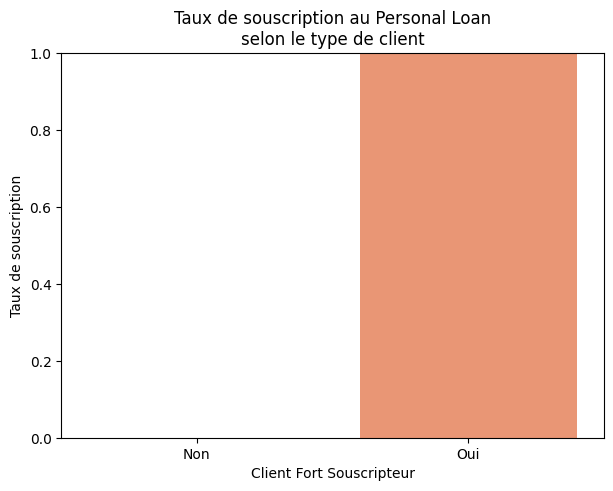

In [23]:
bar_data = (
    df.groupby("Client_Fort_Souscripteur")["Personal Loan"]
      .mean()
      .reset_index()
)

plt.figure(figsize=(7, 5))

sns.barplot(
    data=bar_data,
    x="Client_Fort_Souscripteur",
    y="Personal Loan",
    palette="Set2"
)

plt.title("Taux de souscription au Personal Loan\nselon le type de client")
plt.xlabel("Client Fort Souscripteur")
plt.ylabel("Taux de souscription")
plt.ylim(0, 1)

plt.show()

In [26]:
taux_education = (
    df.groupby("Education")["Personal Loan"]
      .mean()
      .reset_index()
)

print(taux_education)

   Education  Personal Loan
0          1       0.044370
1          2       0.129722
2          3       0.136576


In [27]:
taux_global = df["Personal Loan"].mean()
print(f"Taux global de demande de crédit : {taux_global:.2%}")

Taux global de demande de crédit : 9.60%


In [50]:
df["Income_group"] = pd.qcut(
    df["Income"], q=4,
    labels=["Faible", "Moyen", "Élevé", "Très élevé"]) #création d'une colone Income en 4 groupes
df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,IncomeGroup,AgeGroup,Income_group
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0,<50k,20-29,Moyen
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0,<50k,40-49,Faible
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0,<50k,30-39,Faible
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0,50-100k,30-39,Très élevé
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1,<50k,30-39,Moyen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0,<50k,20-29,Moyen
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0,<50k,20-29,Faible
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0,<50k,60+,Faible
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0,<50k,60+,Moyen


In [52]:
profil = df.groupby(
    ["IncomeGroup", "Education", "AgeGroup"]
)["Personal Loan"].mean().reset_index()

profil.sort_values("Personal Loan", ascending=False).head(5)

/tmp/ipython-input-3255117720.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  profil = df.groupby(


,IncomeGroup,Education,AgeGroup,Personal Loan
57,>200k,3,40-49,1.000000
56,>200k,3,30-39,1.000000
52,>200k,2,40-49,1.000000
43,100-200k,3,50-59,0.916667
42,100-200k,3,40-49,0.895833


In [53]:
taux_income = (
    df.groupby("Income_group")["Personal Loan"]
      .mean()
      .reset_index()
)

print(taux_income)

  Income_group  Personal Loan
0       Faible       0.000000
1        Moyen       0.001616
2        Élevé       0.028239
3   Très élevé       0.356340


/tmp/ipython-input-747917946.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("Income_group")["Personal Loan"]


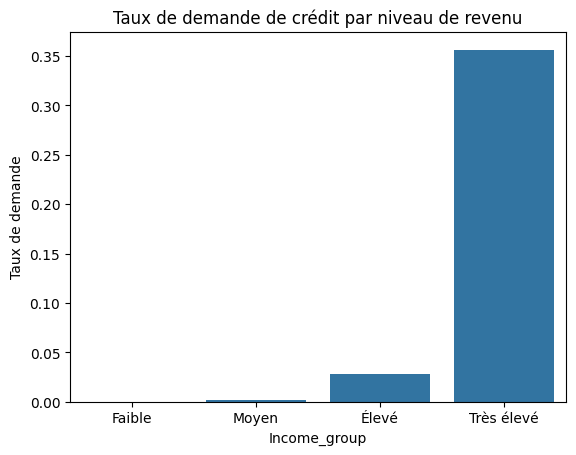

In [31]:
sns.barplot(data=taux_income, x="Income_group", y="Personal Loan")
plt.title("Taux de demande de crédit par niveau de revenu")
plt.ylabel("Taux de demande")
plt.show()

In [32]:
taux_income = (
    df.groupby("Income_group")["Personal Loan"]
      .mean()
      .reset_index()
)

print(taux_income)

  Income_group  Personal Loan
0       Faible       0.000000
1        Moyen       0.001616
2        Élevé       0.028239
3   Très élevé       0.356340


/tmp/ipython-input-747917946.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("Income_group")["Personal Loan"]


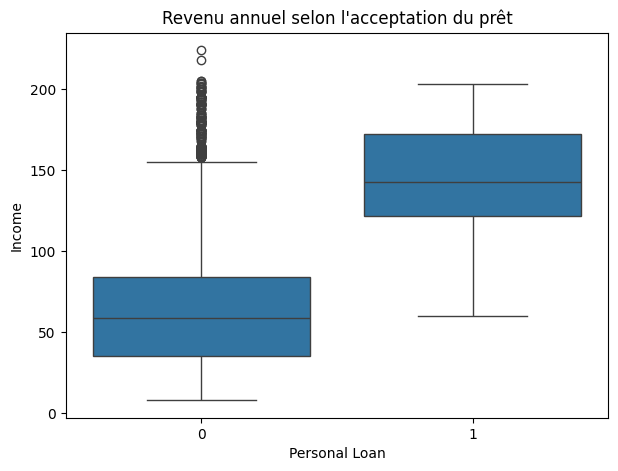

In [33]:
plt.figure(figsize=(7,5))
sns.boxplot(x="Personal Loan", y="Income", data=df)
plt.title("Revenu annuel selon l'acceptation du prêt")
plt.show()


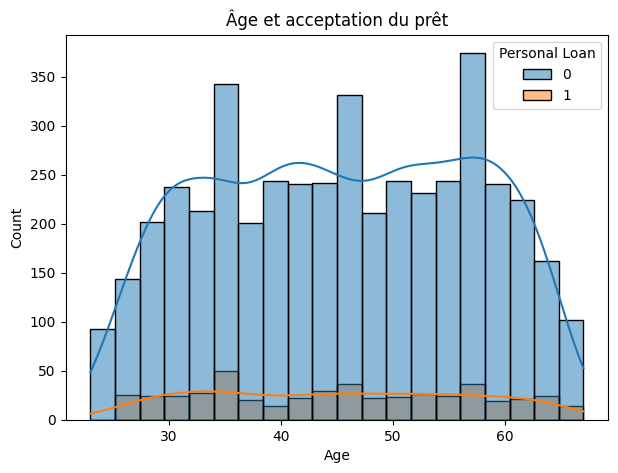

In [34]:
plt.figure(figsize=(7,5))
sns.histplot(data=df, x="Age", hue="Personal Loan", bins=20, kde=True)
plt.title("Âge et acceptation du prêt")
plt.show()


In [35]:
accept_rate = df["Personal Loan"].mean()*100
accept_rate

np.float64(9.6)

/tmp/ipython-input-2262785289.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_segment = df.groupby("IncomeGroup")["Personal Loan"].mean()*100


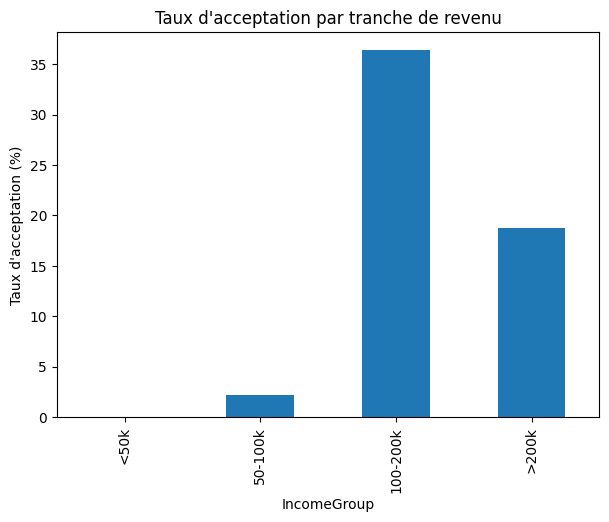

In [36]:
df["IncomeGroup"] = pd.cut(df["Income"],
                           bins=[0,50,100,200,500],
                           labels=["<50k","50-100k","100-200k",">200k"])

income_segment = df.groupby("IncomeGroup")["Personal Loan"].mean()*100

plt.figure(figsize=(7,5))
income_segment.plot(kind="bar")
plt.ylabel("Taux d'acceptation (%)")
plt.title("Taux d'acceptation par tranche de revenu")
plt.show()


/tmp/ipython-input-642514965.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_segment = df.groupby("AgeGroup")["Personal Loan"].mean()*100


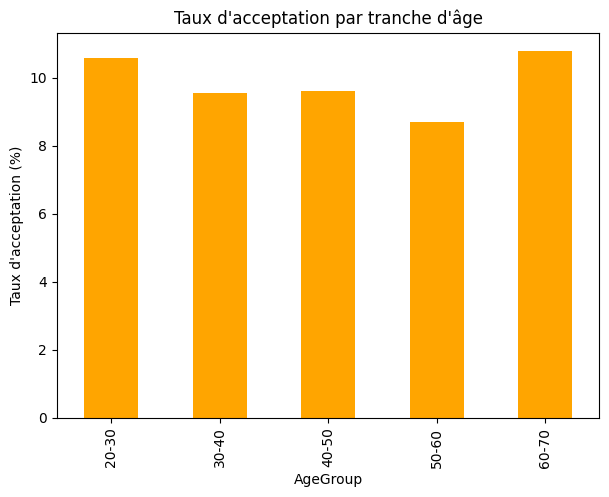

AgeGroup
60-70    10.786106
20-30    10.576923
40-50     9.606299
30-40     9.546926
50-60     8.692366
Name: Personal Loan, dtype: float64


In [37]:
df["AgeGroup"] = pd.cut(df["Age"],
                        bins=[20,30,40,50,60,70],
                        labels=["20-30","30-40","40-50","50-60","60-70"])

age_segment = df.groupby("AgeGroup")["Personal Loan"].mean()*100

plt.figure(figsize=(7,5))
age_segment.plot(kind="bar", color="orange")
plt.ylabel("Taux d'acceptation (%)")
plt.title("Taux d'acceptation par tranche d'âge")
plt.show()

print(age_segment.sort_values(ascending=False))

/tmp/ipython-input-892780524.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segment_combo = df.groupby(["IncomeGroup","AgeGroup"])["Personal Loan"].mean().unstack()*100


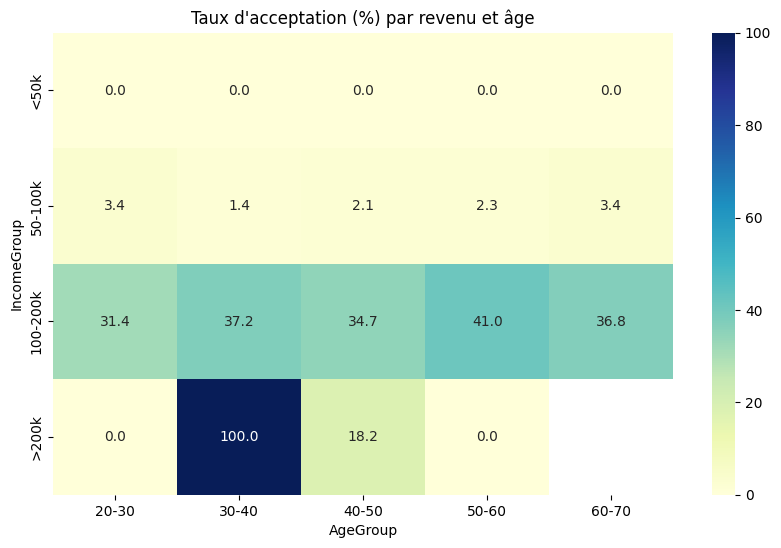

In [38]:
segment_combo = df.groupby(["IncomeGroup","AgeGroup"])["Personal Loan"].mean().unstack()*100

plt.figure(figsize=(10,6))
sns.heatmap(segment_combo, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title("Taux d'acceptation (%) par revenu et âge")
plt.show()

In [39]:
key_segments = df.groupby(["IncomeGroup","AgeGroup"])["Personal Loan"].mean()*100
key_segments = key_segments.reset_index().sort_values("Personal Loan", ascending=False)

print("Profils les plus réceptifs au prêt :")
print(key_segments.head(5))


Profils les plus réceptifs au prêt :
   IncomeGroup AgeGroup  Personal Loan
16       >200k    30-40     100.000000
13    100-200k    50-60      41.035857
11    100-200k    30-40      37.162162
14    100-200k    60-70      36.805556
12    100-200k    40-50      34.700315


/tmp/ipython-input-4107071865.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  key_segments = df.groupby(["IncomeGroup","AgeGroup"])["Personal Loan"].mean()*100


In [40]:
# Séparer les clients en deux groupes
# Clients qui ont accepté le prêt
clients_oui = df[df["Personal Loan"] == 1]

# Clients qui n'ont pas accepté le prêt
clients_non = df[df["Personal Loan"] == 0]


#Choisir les variables à analyser
variables = ["Age", "Income", "CCAvg", "Mortgage"]


# Calculer les moyennes pour chaque groupe
moyennes_oui = clients_oui[variables].mean()
moyennes_non = clients_non[variables].mean()


# Afficher le profil type des clients réceptifs
print("=== PROFIL CLIENT RÉCEPTIF AU PRÊT ===\n")

print("- Âge moyen :",
      round(moyennes_oui["Age"], 1), "ans",
      "(contre", round(moyennes_non["Age"], 1), "ans)")

print("- Revenu annuel moyen :",
      round(moyennes_oui["Income"], 0), "k$",
      "(contre", round(moyennes_non["Income"], 0), "k$)")

print("- Dépenses moyennes carte de crédit :",
      round(moyennes_oui["CCAvg"], 1), "k$/mois",
      "(contre", round(moyennes_non["CCAvg"], 1), "k$/mois)")

print("- Montant hypothécaire moyen :",
      round(moyennes_oui["Mortgage"], 0), "k$",
      "(contre", round(moyennes_non["Mortgage"], 0), "k$)")

print("\nNombre de clients ayant accepté le prêt :", len(clients_oui))
print("Nombre total de clients :", len(df))


# Générer quelques conclusions simples
print("\n=== INSIGHTS ===")

if moyennes_oui["Income"] > moyennes_non["Income"]:
    print("💡 Les clients avec un revenu plus élevé acceptent plus souvent le prêt.")

if moyennes_oui["CCAvg"] > moyennes_non["CCAvg"]:
    print("💡 Les clients qui dépensent plus avec leur carte sont plus réceptifs.")

if moyennes_oui["Mortgage"] > moyennes_non["Mortgage"]:
    print("💡 Un prêt immobilier plus élevé semble lié à l’acceptation du prêt.")

=== PROFIL CLIENT RÉCEPTIF AU PRÊT ===

- Âge moyen : 45.1 ans (contre 45.4 ans)
- Revenu annuel moyen : 145.0 k$ (contre 66.0 k$)
- Dépenses moyennes carte de crédit : 3.9 k$/mois (contre 1.7 k$/mois)
- Montant hypothécaire moyen : 101.0 k$ (contre 52.0 k$)

Nombre de clients ayant accepté le prêt : 480
Nombre total de clients : 5000

=== INSIGHTS ===
💡 Les clients avec un revenu plus élevé acceptent plus souvent le prêt.
💡 Les clients qui dépensent plus avec leur carte sont plus réceptifs.
💡 Un prêt immobilier plus élevé semble lié à l’acceptation du prêt.


In [41]:
import pandas as pd

# Charger le dataset
df = pd.read_csv("hf://datasets/kheejay88/Bank_Personal_Loan_Modelling/Bank_Personal_Loan_Modelling.csv")

# Exemple : ajout de tranches de revenu et d’âge
df["IncomeGroup"] = pd.cut(
    df["Income"],
    bins=[0,50,100,200,1000],
    labels=["<50k", "50-100k", "100-200k", ">200k"]
)

df["AgeGroup"] = pd.cut(
    df["Age"],
    bins=[20,30,40,50,60,100],
    labels=["20-29", "30-39", "40-49", "50-59", "60+"]
)

# Exporter en CSV
df.to_csv("bank_personal_loan_prepared.csv", index=False, encoding="utf-8")
print("✅ Dataset exporté avec succès !")


✅ Dataset exporté avec succès !


In [42]:
df.to_csv("Bank_Personal_Loan_Modelling_export.csv", index=False)

In [43]:
from google.colab import files
files.download ("bank_personal_loan_prepared.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>